# Zero inflated Poisson

In [16]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import statsmodels.discrete.count_model as cm

### Generate data

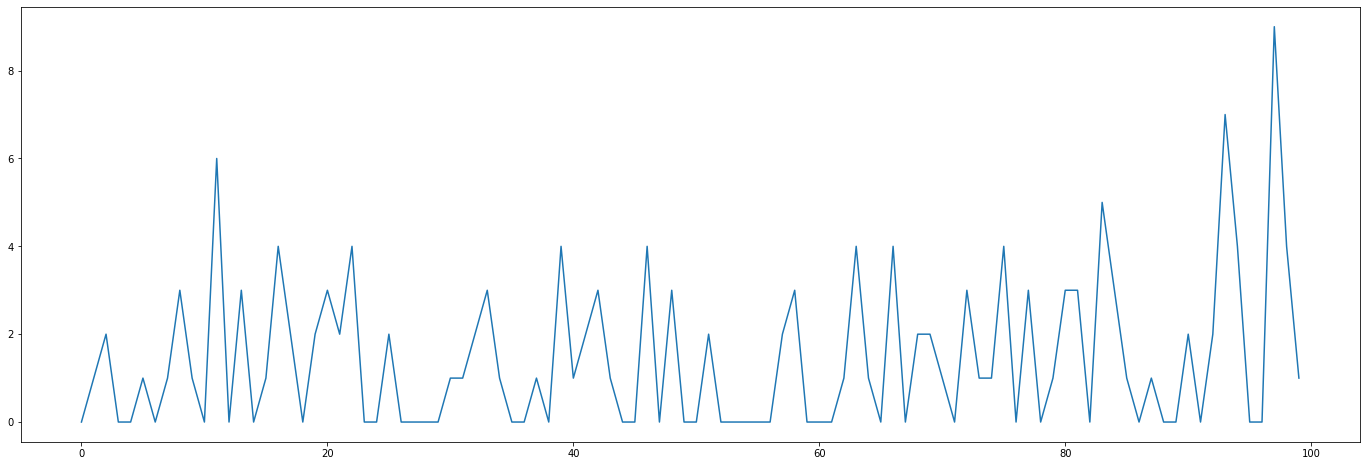

In [44]:
n = 100000
x0 = np.random.normal(6, 1, size=n)
x1 = np.random.normal(6, 1, size=n)
x = np.stack([x0, x1]).T
pois = np.zeros(n)
zinf = np.zeros(n)

pois_params = np.array([0.2, -0.1])
zinf_params = np.array([0.3, -0.2])

pois = np.random.poisson(np.exp(x @ p_params))
zinf = np.random.logistic(x @ zi_params) > 0

y = pois * zinf
plt.figure(figsize=(24,8))
plt.plot(y[:100]);
plt.show()

### Train model

In [46]:
mask = np.random.rand(n) <= 0.7
x_train = x[mask]
y_train = y[mask]
x_test = x[~mask]
y_test = y[~mask]

out = cm.ZeroInflatedPoisson(y_train, x_train, exog_infl=x_train)
res = out.fit()
res.summary()

C:\Program Files\Python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 1.466875
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                       y   No. Observations:                70296
Model:             ZeroInflatedPoisson   Df Residuals:                    70294
Method:                            MLE   Df Model:                            1
Date:                 Sat, 20 Feb 2021   Pseudo R-squ.:                 0.02696
Time:                         22:10:52   Log-Likelihood:            -1.0312e+05
converged:                        True   LL-Null:                   -1.0597e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inflate_x1    -0.2954      0.007    -40.517      0.000      -0.310      -0.281
inflate_x2     0.1943      0.007     26.799      0.000       0.180       0.208
x1             0.1948      0.003     73.800      0.000       0.190       0.200
x2            -0.0941      0.003    -32.861      0.000      -0.100      -0.088
==============================================================================
"""

### Predict

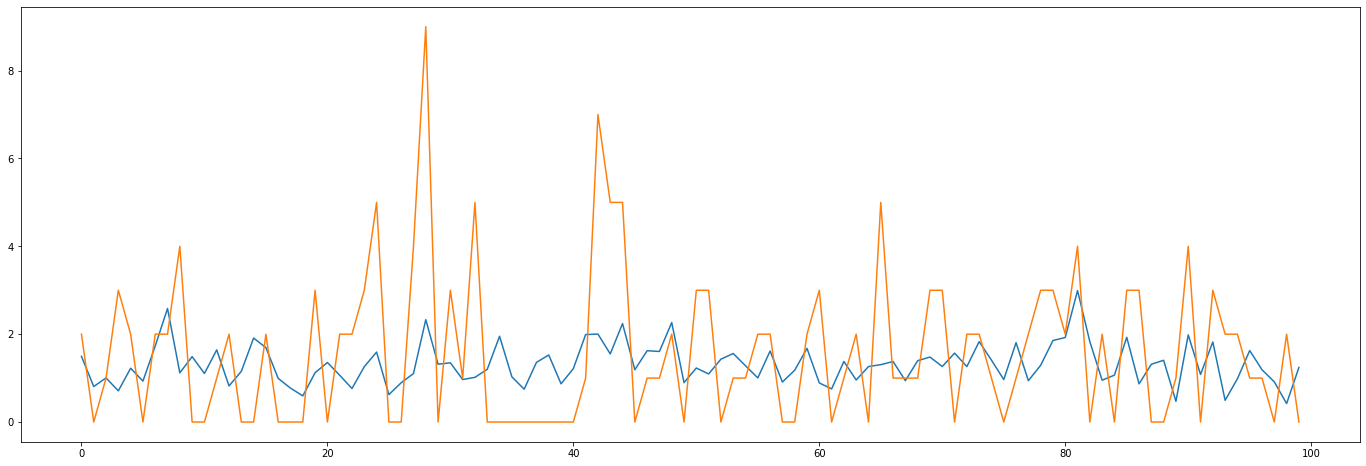

In [47]:
pred = res.predict(x_test, exog_infl=x_test, which='mean')
plt.figure(figsize=(24,8))
plt.plot(pred[:100]);
plt.plot(y_test[:100])
plt.show();

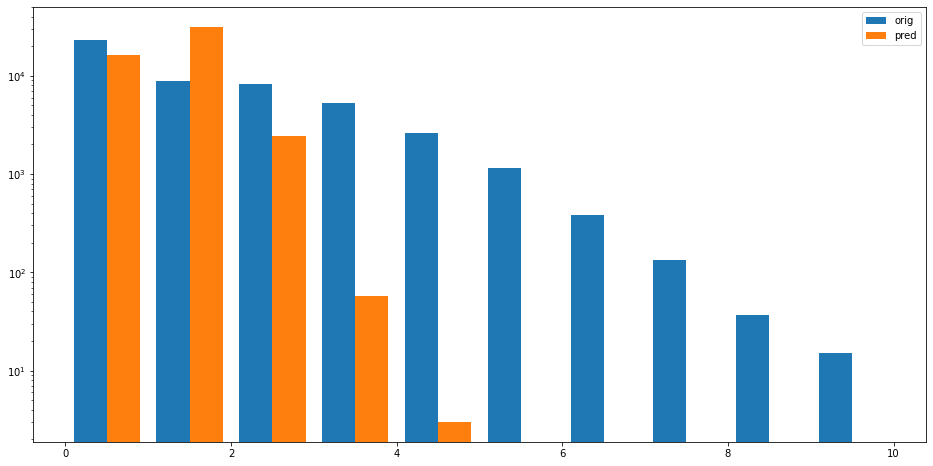

In [28]:
plt.figure(figsize=(16,8))
plt.hist([y_test, pred], log=True, bins=max(y_test))
plt.legend(('orig','pred'));

### Credits & Links

https://stats.stackexchange.com/questions/450355/predicted-counts-for-zero-inflated-poisson-model-differ-from-original-samples